# WASP-178

In [1]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [2]:
name = 'HD-134004'

In [3]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))

In [4]:
obs = om.Observation.from_files(fnames)

In [5]:
obs

HD-134004 [4 Visits]

In [6]:
obs.fit_transit(fit_t0=True, fit_period=True, fit_inc=False)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

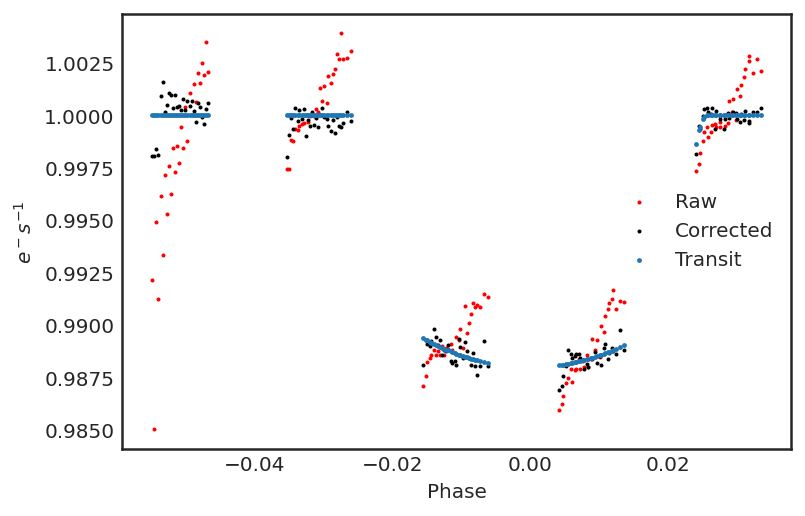

In [7]:
obs.plot()

In [8]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/4 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:  25%|██▌       | 1/4 [00:10<00:31, 10.64s/it]

Fitting Transit/Eclipse Model:  50%|█████     | 2/4 [00:20<00:20, 10.04s/it]

Fitting Transit/Eclipse Model:  75%|███████▌  | 3/4 [00:30<00:09,  9.96s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 4/4 [00:40<00:00,  9.94s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 4/4 [00:40<00:00, 10.01s/it]

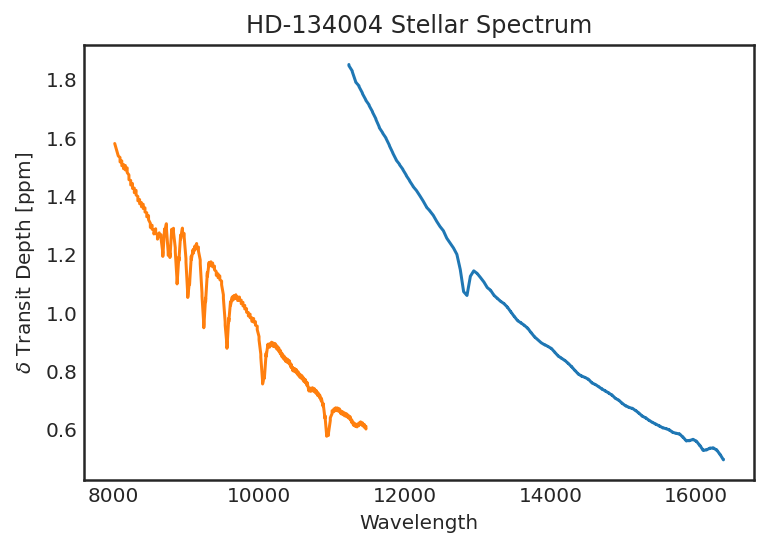

In [9]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

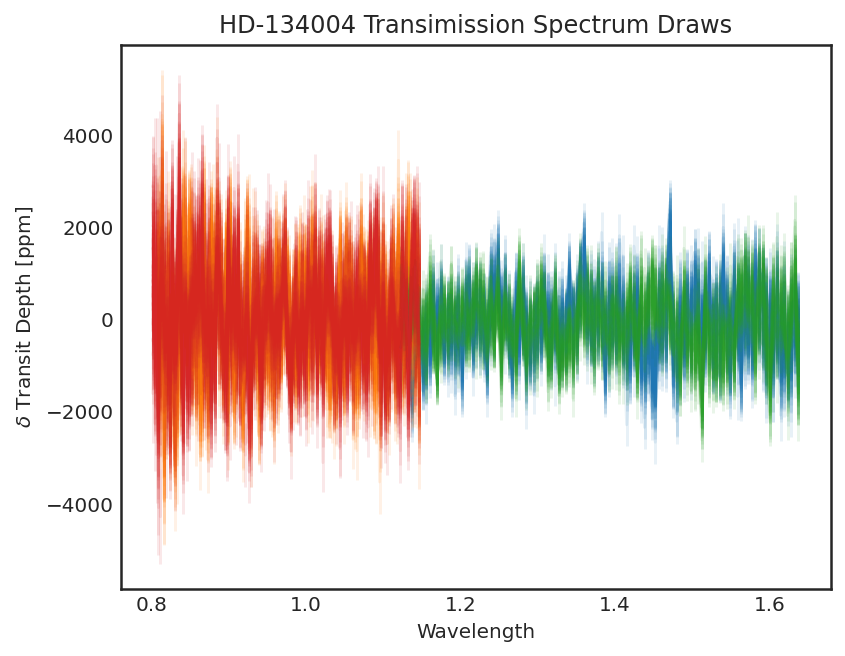

In [10]:
obs.plot_spectra()

[Text(0.5, 1.0, 'WASP-107 Transmission Spectrum')]

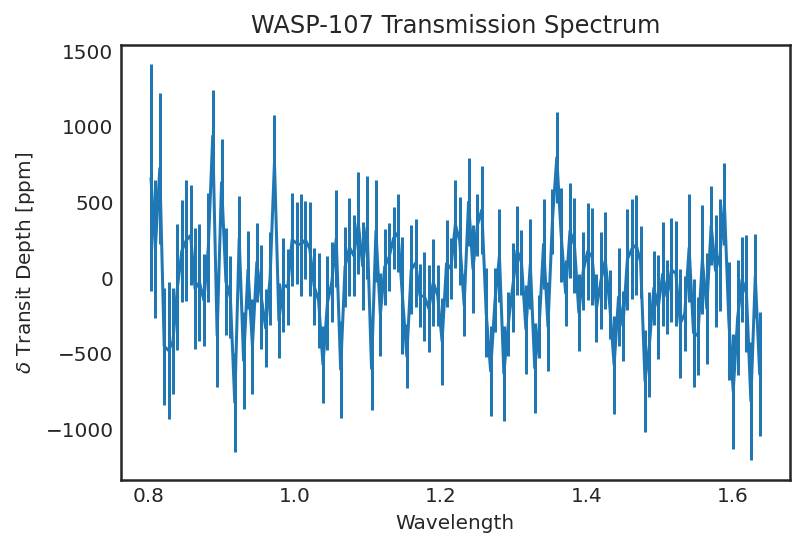

In [11]:
ax = om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 150)).plot()
ax.set(title='WASP-107 Transmission Spectrum')

In [12]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits')
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits')
except:
    pass

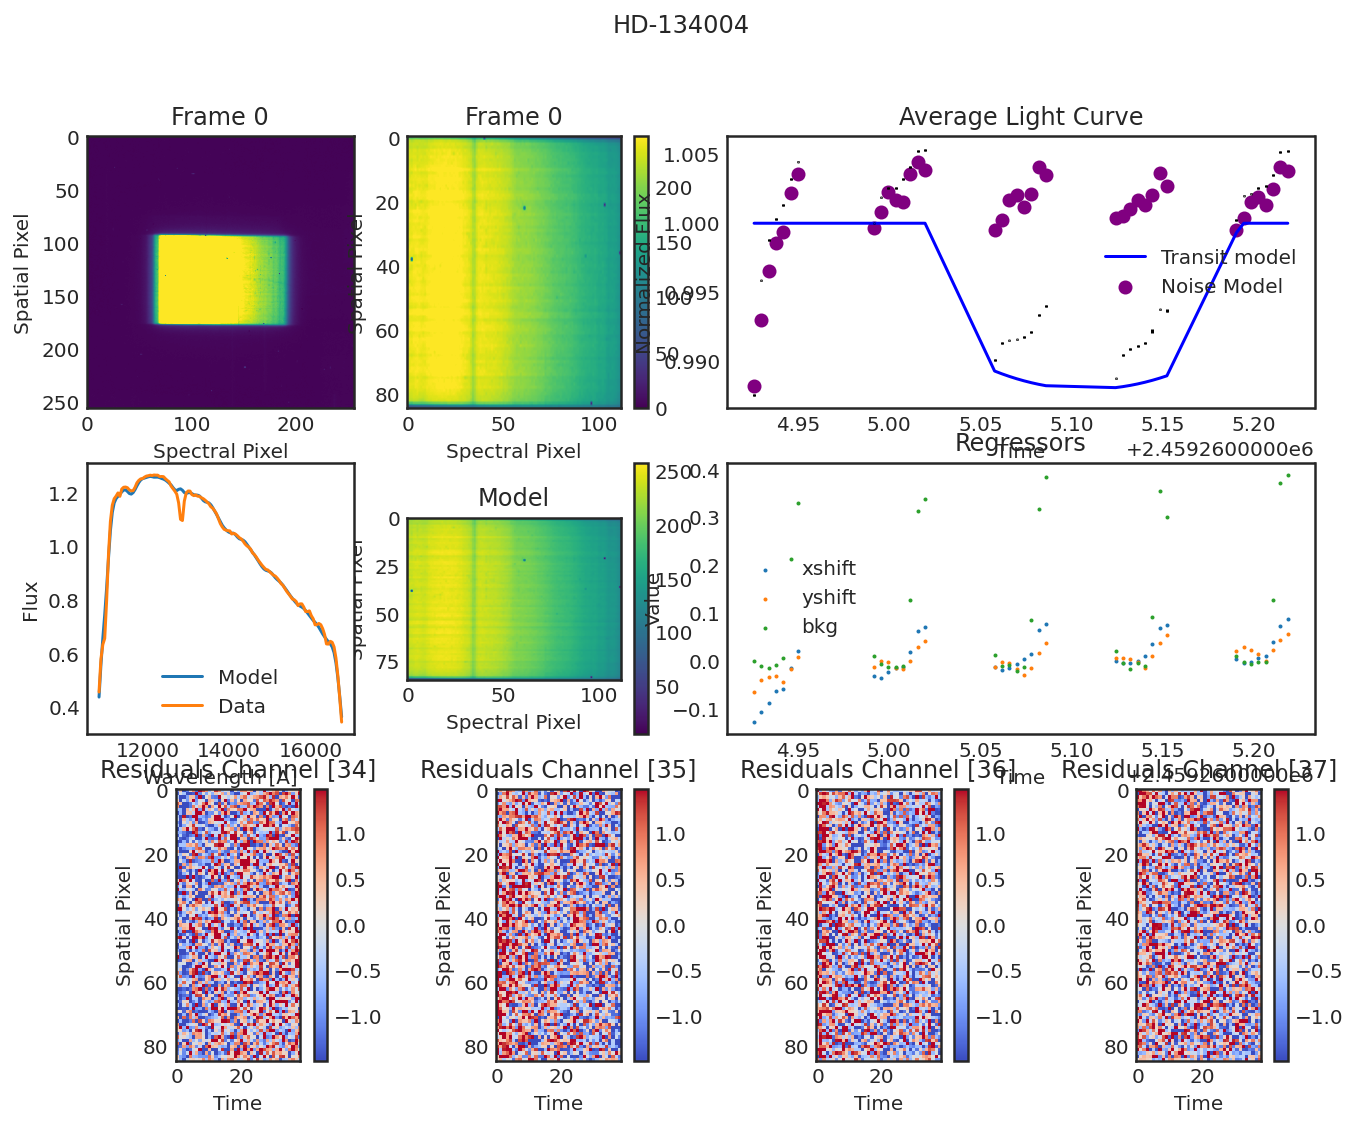

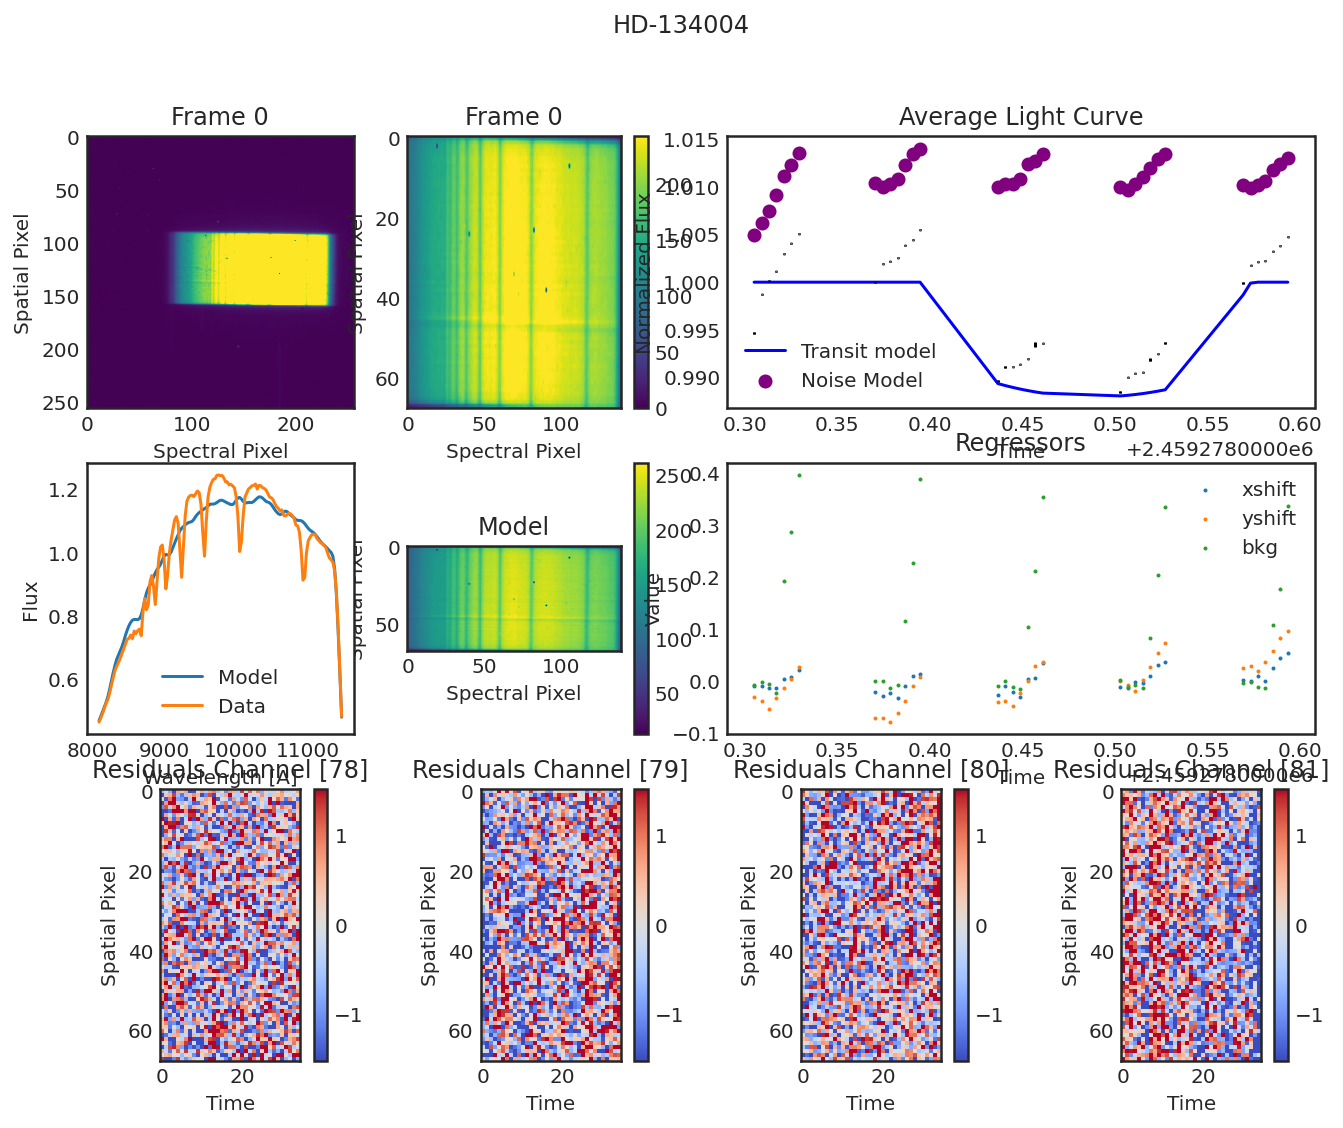

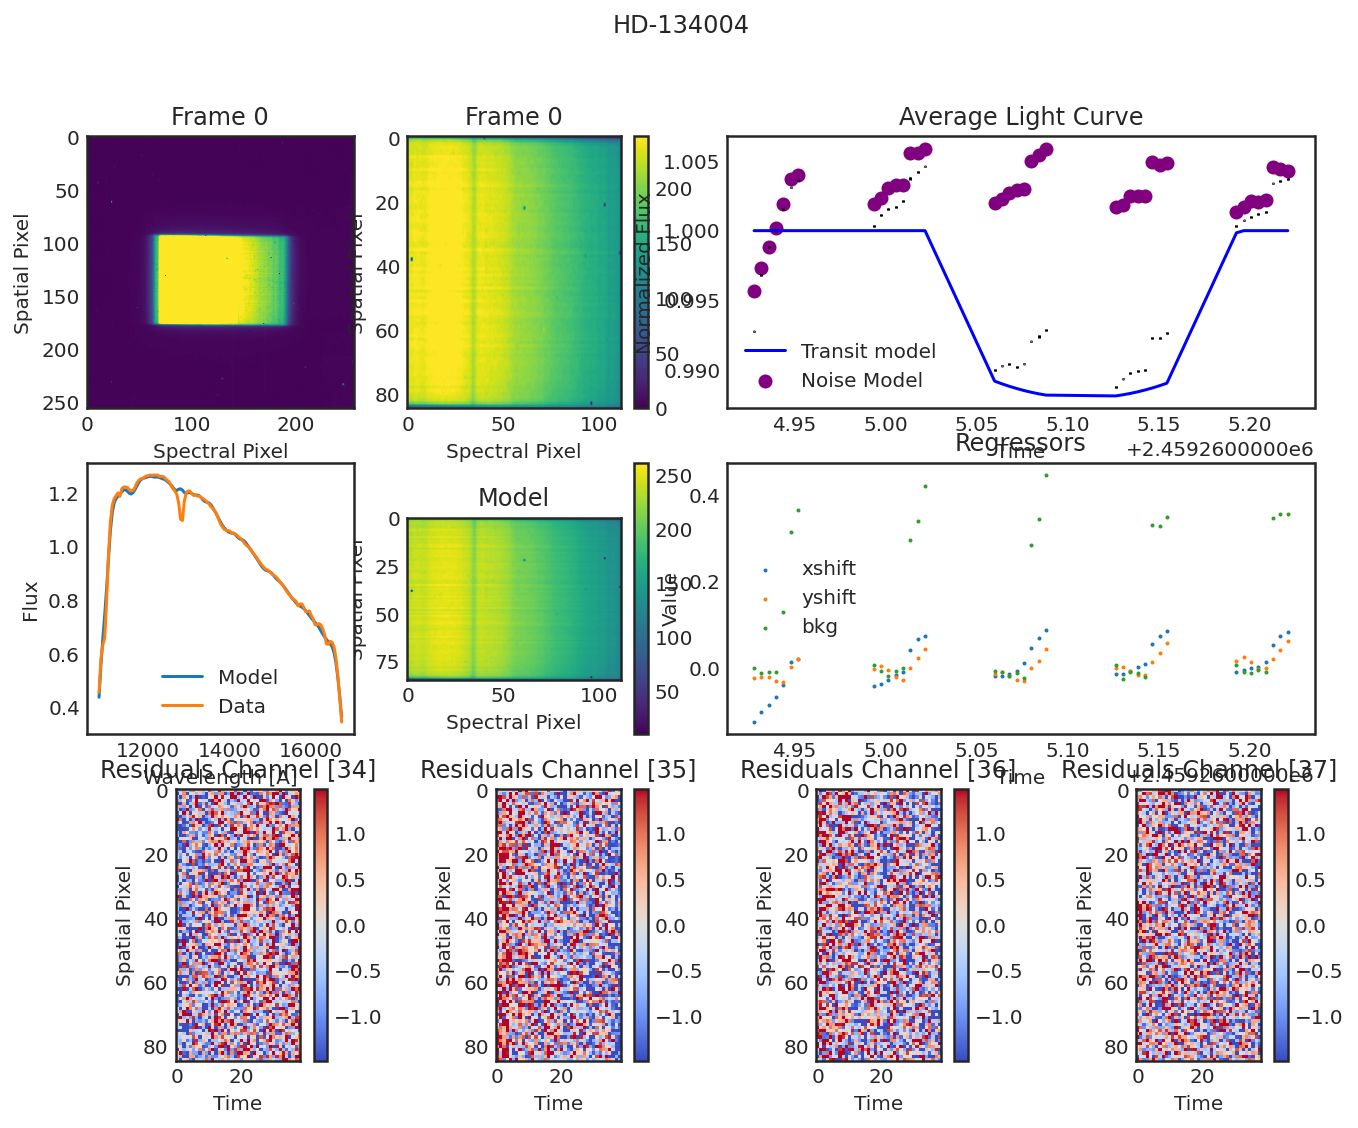

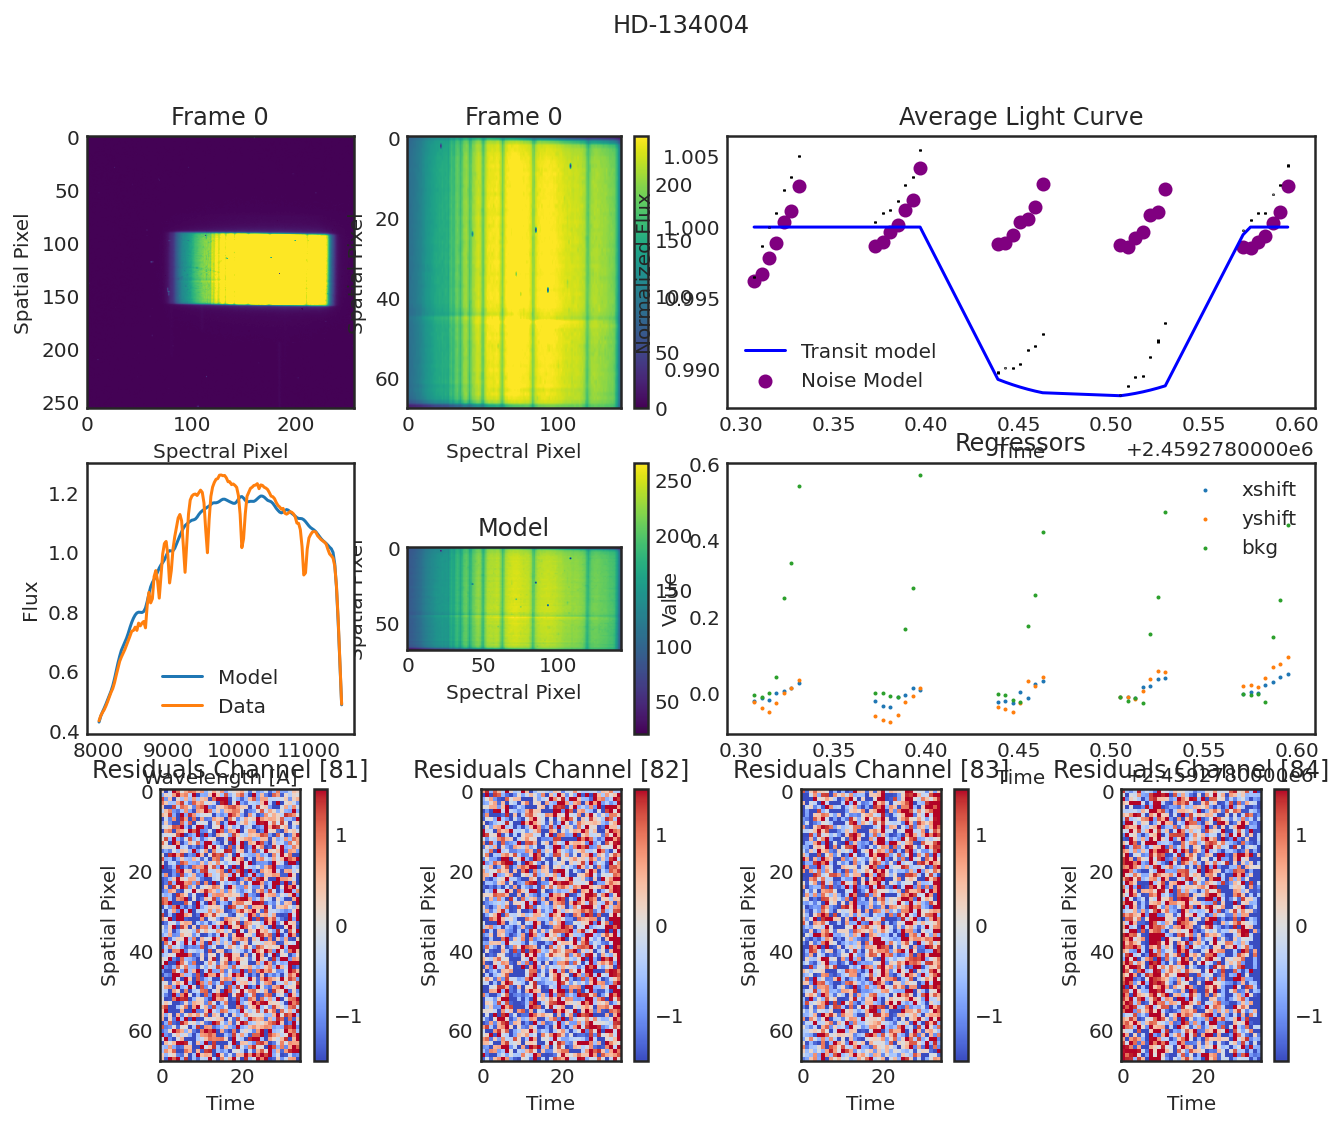

In [13]:
for visit in obs:
    visit.diagnose();
    plt.show();